# Sparse Bayesian Linear Regression with Horseshoe Prior

Bayesian linear regression is a probabilistic approach to linear regression, where we assume that the target variable is normally distributed around a linear combination of the input variables.

$$
\begin{aligned}
    y^{(d)} | x^{(d)}, w, \sigma_n^2 \sim \mathcal{N}(y | w^\top x^{(d)}, \sigma_n^2)
\end{aligned}
$$

## The Horseshoe Prior

[Malakic & Schmidt (2016)] proposed a **sparse Bayesian linear regression model**, where the weights are assumed to be distributed according to a horseshoe distribution [Carvalho+ (2010)], which is given by

$$
\begin{aligned}
    w_i | \lambda_i, \tau, \sigma_n^2 &\sim \mathcal{N}(w_i | 0, \lambda_i^2 \tau^2 \sigma_n^2) && i = 1, \dots, N, \\
    \lambda_i &\sim \mathcal{C}^+(\lambda_i | 0, 1) && i = 1, \dots, N, \\
    \tau &\sim \mathcal{C}^+(\tau | 0, 1), \\
    \sigma_n^2 &\sim \frac{1}{\sigma_n^2} d\sigma_n^2,
\end{aligned}
$$

with parameters

- $w_i$ being the weights,
- $\lambda_i$ being the local shrinkage parameters associated with each $w_i$,
- $\tau$ being the global shrinkage parameter, and
- $\sigma_n^2$ being the noise variance.

$\mathcal{C}^+(\cdot | 0, 1)$ denotes the half-Cauchy distribution with location $0$ and scale $1$:

$$
\begin{aligned}
    \mathcal C^+(z | 0, 1) = \frac{2}{\pi} \frac{1}{1 + z^2}, \quad z \gt 0.
\end{aligned}
$$

$\sigma_n^2 \sim \sigma_n^{-2} d\sigma_n^2$ means that $\sigma_n^2$ is distributed according to an improper distribution (here, 'improper' means that the distribution does not satisfy $\int p(\sigma_n^2) d\sigma_n^2 = 1$):

$$
\begin{aligned}
    p(\sigma_n^2) \propto \frac{1}{\sigma_n^2},
\end{aligned}
$$

which can be interpreted as an inverse-gamma distribution with shape parameter $\alpha \to 0$ and scale parameter $\beta \to 0$:

$$
\begin{aligned}
    \lim_{\alpha_n, \beta_n \to 0}
    \Gamma^{-1} (\sigma_n^2 | \alpha_n, \beta_n)
    =
    \lim_{\alpha_n, \beta_n \to 0}
    \frac{\beta_n^{\alpha_n}}{\Gamma(\alpha_n)}
    \left( \frac{1}{\sigma_n^2} \right)^{\alpha_n + 1}
    \exp \left( -\frac{\beta_n}{\sigma_n^2} \right).
\end{aligned}
$$

The horseshoe distribution is a heavy-tailed distribution, which allows for a large number of weights to be close to zero, while still allowing for a few weights to be large.

## Reformulation of the Horseshoe Prior

According to [Wand+ (2011)], a half-Cauchy distribution $\mathcal{C}^+(x | 0, a)$ can be reformulated as a scale mixture of inverse-gammas:

$$
\begin{aligned}
    x^2 | a' &\sim \Gamma^{-1} \left( x^2 \middle| \frac{1}{2}, \frac{1}{a'} \right), \\
    a' | a &\sim \Gamma^{-1} \left( a' \middle| \frac{1}{2}, \frac{1}{a^2} \right),
\end{aligned}
$$

and thus the horseshoe distribution can be reformulated as [Makalic & Schmidt (2016)]

$$
\begin{aligned}
    w_i | \lambda_i, \tau, \sigma_n^2
    &\sim \mathcal{N}(w_i | 0, \lambda_i^2 \tau^2 \sigma_n^2)
    & i &= 1, \dots, N,
    \\
    \lambda_i^2 | \mu_i
    &\sim \Gamma^{-1} \left( \lambda_i^2 \middle| \frac{1}{2}, \frac{1}{\nu_i} \right),
    & i &= 1, \dots, N,
    \\
    \tau^2 | \xi
    &\sim \Gamma^{-1} \left( \tau^2 \middle| \frac{1}{2}, \frac{1}{\xi} \right),
    \\
    \nu_i, \xi
    &\sim \Gamma^{-1} \left( \cdot \middle| \frac{1}{2}, 1 \right),
    & i &= 1, \dots, N,
    \\
    \sigma_n^2
    &\sim \frac{1}{\sigma_n^2} d\sigma_n^2.
\end{aligned}
$$

## Posterior

The above hierarchical expression allows us to write the posterior distributions as

$$
\begin{aligned}
    w | \Theta \setminus \{ w \}
    &\sim \mathcal{N}(w | A^{-1} X^\top y, \sigma_n^2 A^{-1}), 
    \\

    \sigma_n^2 | \Theta \setminus \{ \sigma_n^2 \}
    &\sim \Gamma^{-1} \left( \sigma_n^2 \middle| \frac{N + D}{2}, \frac{\| y - X w \|_2^2}{2} + \frac{w^\top \Lambda_\ast^{-1} w}{2} \right),
    \\

    \lambda_i^2 | \Theta \setminus \{ \lambda_i^2 \}
    &\sim \Gamma^{-1} \left( \lambda_i^2 \middle| 1, \frac{1}{\nu_i} + \frac{w_i^2}{2 \sigma_n^2 \tau^2} \right),
    & i &= 1, \dots, N,
    \\

    \tau^2 | \Theta \setminus \{ \tau^2 \}
    &\sim \Gamma^{-1} \left( \tau^2 \middle| \frac{N + 1}{2}, \frac{1}{\xi} + \frac{\| w \|_2^2}{2 \sigma_n^2 \| \lambda \|_2^2} \right),
    \\
    
    \nu_i | \Theta \setminus \{ \nu_i \}
    &\sim \Gamma^{-1} \left( \nu_i \middle| 1, 1 + \frac{1}{\lambda_i^2} \right),
    & i &= 1, \dots, N,
    \\

    \xi | \Theta \setminus \{ \xi \}
    &\sim \Gamma^{-1} \left( \xi \middle| 1, 1 + \frac{1}{\tau^2} \right),
\end{aligned}
$$

where

$$
\begin{aligned}
    A &= X^\top X + \Lambda_\ast^{-1},
    \\

    \Lambda_\ast^{-1}
    &= \frac{1}{\tau^2} \mathop{\rm diag}\left( \frac{1}{\lambda_1^2}, \dots, \frac{1}{\lambda_N^2} \right).
\end{aligned}
$$

In the above, $\Theta \setminus \{ w \}$ denotes the set of all parameters except for $w$, and similarly for the other parameters.

## Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from typing import Optional

In [2]:
def sample_w_posterior(
    x_data:   np.ndarray,
    y_data:   np.ndarray,
    L:        np.ndarray,
    sigma2_n: float,
    seed:     Optional[int]=None
):
    rng = np.random.default_rng(seed)
    A     = x_data.T @ x_data + np.diag(1 / L)
    A_inv = np.linalg.inv(A)
    m     = A_inv @ x_data.T @ y_data
    V     = sigma2_n * A_inv
    return rng.multivariate_normal(m, V)

def sample_sigma2_n_posterior(
    x_data: np.ndarray,
    y_data: np.ndarray,
    w:      np.ndarray,
    L:      np.ndarray,
    seed:   Optional[int]=None
):
    rng = np.random.default_rng(seed)
    N = w.shape[0]
    D = y_data.shape[0]
    shape = (N + D) / 2
    scale = np.sum((y_data - x_data @ w)**2) / 2 + np.sum(w**2 / L) / 2
    return 1 / rng.gamma(shape, 1 / scale)

def sample_lamb2_posterior(
    w:        np.ndarray,
    tau2:     float,
    nu:       np.ndarray,
    sigma2_n: float,
    seed:     Optional[int]=None
):
    rng = np.random.default_rng(seed)
    shape = 1
    scale = 1 / nu + w**2 / sigma2_n / tau2 / 2
    return 1 / rng.gamma(shape, 1 / scale)

def sample_tau2_posterior(
    w:        np.ndarray,
    lamb2:    np.ndarray,
    xi:       float,
    sigma2_n: float,
    seed:     Optional[int]=None
):
    rng = np.random.default_rng(seed)
    N = w.shape[0]
    shape = (N + 1) / 2
    scale = 1 / xi + np.sum( w**2 / lamb2 ) / sigma2_n / 2
    return 1 / rng.gamma(shape, 1 / scale)

def sample_nu_posterior(
    lamb2: np.ndarray,
    seed: Optional[int]=None
):
    rng = np.random.default_rng(seed)
    shape = 1
    scale = 1 + 1 / lamb2
    return 1 / rng.gamma(shape, 1 / scale)

def sample_xi_posterior(
    tau2: float,
    seed: Optional[int]=None
):
    rng = np.random.default_rng(seed)
    shape = 1
    scale = 1 + 1 / tau2
    return 1 / rng.gamma(shape, 1 / scale)

def sample_params_posterior(
    x_data:   np.ndarray,
    y_data:   np.ndarray,
    w:        np.ndarray,
    sigma2_n: float,
    lamb2:    np.ndarray,
    tau2:     float,
    nu:       np.ndarray,
    xi:       float,
    seed:     Optional[int]=None
):
    L        = lamb2 * tau2
    w        = sample_w_posterior(x_data, y_data, L, sigma2_n, seed=seed)
    sigma2_n = sample_sigma2_n_posterior(x_data, y_data, w, L, seed=seed)
    lamb2    = sample_lamb2_posterior(w, tau2, nu, sigma2_n, seed=seed)
    tau2     = sample_tau2_posterior(w, lamb2, xi, sigma2_n, seed=seed)
    nu       = sample_nu_posterior(lamb2, seed=seed)
    xi       = sample_xi_posterior(tau2, seed=seed)
    return w, sigma2_n, lamb2, tau2, nu, xi

In [3]:
N = 32
D = 64

rng = np.random.default_rng(12345)
w_true = rng.normal(0, 10, (N))
x_data = rng.choice([0, 1], (D, N))
y_data = x_data @ w_true

num_iter = 1000

# initialize parameters
w        = np.zeros(N).astype(float)
sigma2_n = 1.
lamb2    = np.ones(N).astype(float)
tau2     = 1.
nu       = np.ones(N).astype(float)
xi       = 1.

MSE_history = []
for iter in tqdm(range(num_iter)):
    w, sigma2_n, lamb2, tau2, nu, xi = sample_params_posterior(x_data, y_data, w, sigma2_n, lamb2, tau2, nu, xi)
    MSE = np.sum( ( y_data - x_data @ w )**2 ) / D
    MSE_history.append(MSE)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:02<00:00, 409.49it/s]


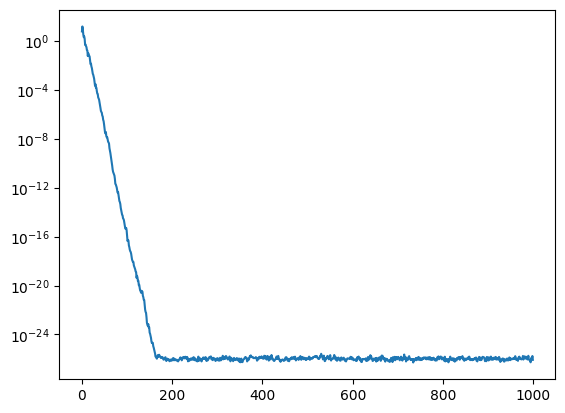

In [4]:
plt.plot(MSE_history)
plt.yscale('log')
plt.show()

## Speeding Up the Inference

Major bottlenecks in the posterior sampling is the inversion of the matrix $A = X^\top X + \Lambda_\ast^{-1}$ and the sampling of multivariate normal, which is $\mathcal{O} (N^3)$ in time complexity. To speed up the computation, we can use a trick written in `FastMultivariateGauss.ipynb` with a setting of

$$
\begin{aligned}
    \Phi &= \frac{X}{\sigma_n}, &
    \alpha &= \frac{y}{\sigma_n}, &
    \Delta &= \sigma_n^2 \Lambda_\ast.
\end{aligned}
$$

In [5]:
def sample_efficient(
    Phi: np.ndarray,
    alpha: np.ndarray,
    Delta: np.ndarray,
    seed: Optional[int]=None
) -> np.ndarray:
    rng = np.random.default_rng(seed)
    D = Phi.shape[0]
    N = Phi.shape[1]

    # Sample u from N(0, Delta)
    if np.isclose(np.diag(np.diag(Delta)), Delta).all():
        u = rng.normal(np.zeros(N), np.sqrt(np.diag(Delta)))
    else:
        u = rng.multivariate_normal(np.zeros(N), Delta)

    # Sample v from N(Phi @ u, I)
    v = rng.normal(Phi @ u, np.ones(D))

    # Solve for w
    w = np.linalg.solve(Phi @ Delta @ Phi.T + np.eye(D), alpha - v)

    return u + Delta @ Phi.T @ w

def sample_w_posterior_efficient(
    x_data:   np.ndarray,
    y_data:   np.ndarray,
    L:        np.ndarray,
    sigma2_n: float,
    seed:     Optional[int]=None
):
    Phi   = x_data / np.sqrt(sigma2_n)
    alpha = y_data / np.sqrt(sigma2_n)
    Delta = np.diag(L) * sigma2_n
    return sample_efficient(Phi, alpha, Delta, seed=seed)

def sample_params_posterior_efficient(
    x_data:   np.ndarray,
    y_data:   np.ndarray,
    w:        np.ndarray,
    sigma2_n: float,
    lamb2:    np.ndarray,
    tau2:     float,
    nu:       np.ndarray,
    xi:       float,
    seed:     Optional[int]=None
):
    L        = lamb2 * tau2
    w        = sample_w_posterior_efficient(x_data, y_data, L, sigma2_n, seed=seed)
    sigma2_n = sample_sigma2_n_posterior(x_data, y_data, w, L, seed=seed)
    lamb2    = sample_lamb2_posterior(w, tau2, nu, sigma2_n, seed=seed)
    tau2     = sample_tau2_posterior(w, lamb2, xi, sigma2_n, seed=seed)
    nu       = sample_nu_posterior(lamb2, seed=seed)
    xi       = sample_xi_posterior(tau2, seed=seed)
    return w, sigma2_n, lamb2, tau2, nu, xi

In [6]:
N = 32
D = 64

rng = np.random.default_rng(12345)
w_true = rng.normal(0, 10, (N))
x_data = rng.choice([0, 1], (D, N))
y_data = x_data @ w_true

num_iter = 1000

# initialize parameters
w        = np.zeros(N).astype(float)
sigma2_n = 1.
lamb2    = np.ones(N).astype(float)
tau2     = 1.
nu       = np.ones(N).astype(float)
xi       = 1.

MSE_history = []
for iter in tqdm(range(num_iter)):
    w, sigma2_n, lamb2, tau2, nu, xi = sample_params_posterior_efficient(x_data, y_data, w, sigma2_n, lamb2, tau2, nu, xi)
    MSE = np.sum( ( y_data - x_data @ w )**2 ) / D
    MSE_history.append(MSE)

100%|██████████| 1000/1000 [00:01<00:00, 836.63it/s]


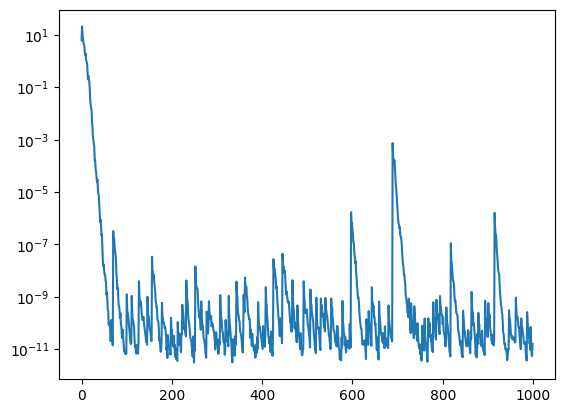

In [7]:
plt.plot(MSE_history)
plt.yscale('log')
plt.show()

In [8]:
# Speed comparison
import time

N = 128
D = 256

rng = np.random.default_rng(12345)
w_true = rng.normal(0, 10, (N))
x_data = rng.choice([0, 1], (D, N))
y_data = x_data @ w_true

num_iter = 100

# initialize parameters
w        = np.zeros(N).astype(float)
sigma2_n = 1.
lamb2    = np.ones(N).astype(float)
tau2     = 1.
nu       = np.ones(N).astype(float)
xi       = 1.

start = time.time()
for _ in tqdm(range(100)):
    sample_params_posterior(x_data, y_data, w, sigma2_n, lamb2, tau2, nu, xi)
end = time.time()
time_naive = end - start

start = time.time()
for _ in tqdm(range(100)):
    sample_params_posterior_efficient(x_data, y_data, w, sigma2_n, lamb2, tau2, nu, xi)
end = time.time()
time_efficient = end - start

print(f'naive:     {time_naive:.6f}s')
print(f'efficient: {time_efficient:.6f}s')

100%|██████████| 100/100 [00:00<00:00, 155.16it/s]


naive:     2.769180s
efficient: 0.648253s


## References
- [Carvalho+ (2010)] C. M. Carvalho, N. G. Polson, and J. G. Scott, The Horseshoe Estimator for Sparse Signals, Biometrika **97**, 465 (2010).
- [Wand+ (2011)] M. P. Wand, J. T. Ormerod, S. A. Padoan, and R. Frühwirth, Mean Field Variational Bayes for Elaborate Distributions, Bayesian Analysis **6**, 847 (2011).
- [Makalic & Schmidt (2016)] E. Makalic and D. F. Schmidt, A Simple Sampler for the Horseshoe Estimator, IEEE Signal Processing Letters **23**, 179 (2016).
- [Bhattacharya+ (2016)] A. Bhattacharya, A. Chakraborty, and B. K. Mallick, Fast Sampling with Gaussian Scale Mixture Priors in High-Dimensional Regression, Biometrika **103**, 985 (2016).